<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/Digits_MNIST/blob/main/Nerual_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load Data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,classification_report
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense , Dropout , Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(mnist.load_data.__doc__)

Loads the MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).

    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.

    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.

    **y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(10000,)` for the test data.



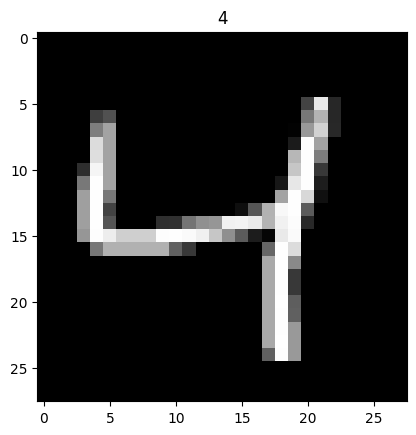

In [4]:
index = 2
plt.imshow(X_train[index], cmap='gray')
plt.title(y_train[index])
plt.show()

# Modeling

Normalization

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

Model Architecture

In [7]:
reg = keras.regularizers.l2(0.00005)
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28), name='flatten'))
model.add(Dense(units=256, activation='relu', kernel_regularizer = reg, name='hidden1'))
model.add(Dropout(0.45, name='drop1'))
model.add(Dense(units=256, activation='relu', kernel_regularizer = reg, name='hidden2' ))
model.add(Dropout(0.45, name='drop2'))
model.add(Dense(units=256, activation='relu', kernel_regularizer = reg, name='hidden3' ))
model.add(Dropout(0.45, name='drop3'))
model.add(Dense(10, activation='softmax', name='output'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 drop1 (Dropout)             (None, 256)               0         
                                                                 
 hidden2 (Dense)             (None, 256)               65792     
                                                                 
 drop2 (Dropout)             (None, 256)               0         
                                                                 
 hidden3 (Dense)             (None, 256)               65792     
                                                                 
 drop3 (Dropout)             (None, 256)               0

Compile Model

In [9]:
opt = tf.optimizers.Adam(learning_rate = 0.0001)
loss = tf.losses.CategoricalCrossentropy()
metrics = tf.metrics.CategoricalAccuracy()
model.compile(optimizer=opt, loss=loss, metrics=metrics)

Fit Model

In [10]:
history = model.fit(X_train, y_train, batch_size=100, epochs=200, validation_split=0.2, verbose=2)

Epoch 1/200
480/480 - 8s - loss: 1.4678 - categorical_accuracy: 0.5158 - val_loss: 0.5080 - val_categorical_accuracy: 0.8737 - 8s/epoch - 17ms/step
Epoch 2/200
480/480 - 3s - loss: 0.6437 - categorical_accuracy: 0.8103 - val_loss: 0.3268 - val_categorical_accuracy: 0.9138 - 3s/epoch - 6ms/step
Epoch 3/200
480/480 - 4s - loss: 0.4828 - categorical_accuracy: 0.8684 - val_loss: 0.2690 - val_categorical_accuracy: 0.9312 - 4s/epoch - 8ms/step
Epoch 4/200
480/480 - 3s - loss: 0.4029 - categorical_accuracy: 0.8935 - val_loss: 0.2354 - val_categorical_accuracy: 0.9421 - 3s/epoch - 6ms/step
Epoch 5/200
480/480 - 3s - loss: 0.3519 - categorical_accuracy: 0.9102 - val_loss: 0.2176 - val_categorical_accuracy: 0.9470 - 3s/epoch - 6ms/step
Epoch 6/200
480/480 - 2s - loss: 0.3222 - categorical_accuracy: 0.9187 - val_loss: 0.2023 - val_categorical_accuracy: 0.9537 - 2s/epoch - 4ms/step
Epoch 7/200
480/480 - 2s - loss: 0.2918 - categorical_accuracy: 0.9266 - val_loss: 0.1893 - val_categorical_accuracy:

# Testing and Evaluation

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0981 - categorical_accuracy: 0.9820


[0.09810693562030792, 0.9819999933242798]

In [12]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)
print(confusion_matrix(y_pred, y_true))

313/313 [==============================] - 1s 2ms/step
[[ 970    0    3    0    0    2    4    1    2    2]
 [   1 1127    1    0    0    0    2    3    0    4]
 [   1    2 1014    2    3    0    0    9    4    0]
 [   1    1    3  997    0   11    1    2    7    8]
 [   0    0    2    0  965    1    3    0    4    5]
 [   1    1    0    4    0  869    3    0    3    3]
 [   3    2    1    0    3    5  943    0    1    0]
 [   1    0    7    5    0    0    0 1010    4    6]
 [   2    2    1    1    3    3    2    0  946    2]
 [   0    0    0    1    8    1    0    3    3  979]]


In [13]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.99      0.99      0.99      1138
           2       0.98      0.98      0.98      1035
           3       0.99      0.97      0.98      1031
           4       0.98      0.98      0.98       980
           5       0.97      0.98      0.98       884
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1033
           8       0.97      0.98      0.98       962
           9       0.97      0.98      0.98       995

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



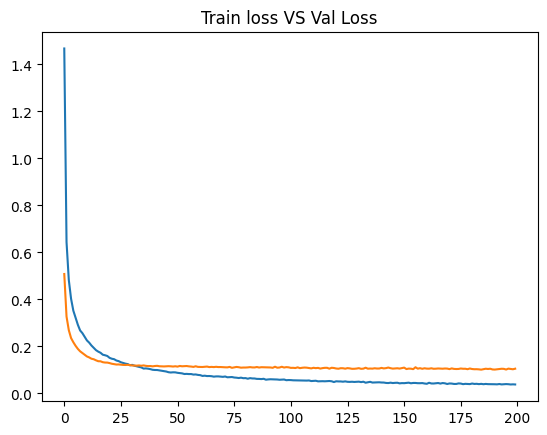

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss VS Val Loss')
plt.show()

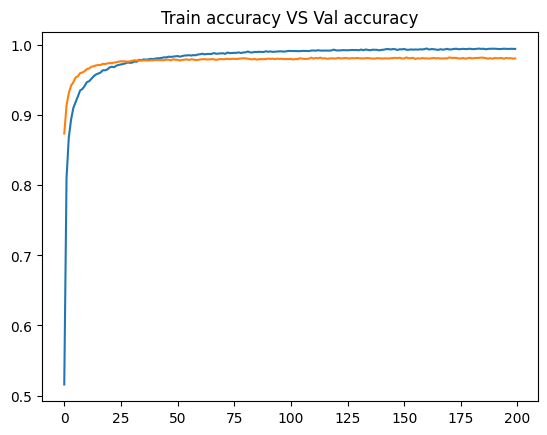

In [15]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Train accuracy VS Val accuracy')
plt.show()